# Etapa 2 - Pré-processamento
## Problemas encontrados com a base:
- Após a execução do Naive Bayes Multinomial, observamos que a base de dados apresenta uma grande diferença em relação a quantidade de atributos em cada classe, o que nos chamou a atenção para as classes estarem desbalanceadas e a necessidade de realizar o balanceamento.
<br>Segue a distribuição das instâncias:

 - positive: 3.857

 - neutral: 365

 - negative: 778

 - Total de instâncias: 5000

# Task: 1
## - Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from math import sqrt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Task 2:
## - Open DataFrame

In [2]:
df = pd.read_csv("/content/Reviews_Classified5k.csv")
df = df.drop(columns="Unnamed: 0")

In [3]:
word_count=pd.value_counts(df['Classification'].values, sort=False)
y=df['Classification']
word_count

positive    3857
negative     778
neutral      365
dtype: int64

# Task 3:
## - Remove stopwords from text and create corpus

In [4]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [5]:
corpus= []
corpus1= []
for i in range(0, df.shape[0]):
    corpus.append(review_to_words(df['Text'][i]))
    corpus1.append(review_to_words(df['Text'][i]))

df['new_Phrase']=corpus
df.drop(['Text'],axis=1,inplace=True)

# Task 4:
## - Create Count Vectorizer for corpus

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = df.iloc[:,1].values

# Task 5:
## - Split Data Frame in train and test
## - Balance Data Frame (OverSample)
## - Train and fit Naive Bayes Multinomial model

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_over, y_over)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

Counter({'positive': 3857, 'negative': 778, 'neutral': 365})
Counter({'positive': 773, 'neutral': 773, 'negative': 773})


# Task 6: 
## - Calculate metrics

In [8]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

# Calculando as métricas: POSITIVOS
precisaoPOS = tp_pos / (tp_pos + fp_pos)
recallPOS = tp_pos / (tp_pos + fn_pos)
accuracyPOS = (tp_pos + vn_pos) / (tp_pos + fn_pos + fp_pos + vn_pos)
f1sPOS = 2 * (precisaoPOS * recallPOS) / (precisaoPOS + recallPOS)

# Calculando as métricas: NEGATIVOS
precisaoNEG = tp_neg / (tp_neg + fp_neg)
recallNEG = tp_neg / (tp_neg + fn_neg)
accuracyNEG = (tp_neg + vn_neg) / (tp_neg + fn_neg + fp_neg + vn_neg)
f1sNEG = 2 * (precisaoNEG * recallNEG) / (precisaoNEG + recallNEG)

# Calculando as métricas: NEUTROS
precisaoNEU = tp_neu / (tp_neu + fp_neu)
recallNEU = tp_neu / (tp_neu + fn_neu)
accuracyNEU = (tp_neu + vn_neu) / (tp_neu + fn_neu + fp_neu + vn_neu)
f1sNEU = 2 * (precisaoNEU * recallNEU) / (precisaoNEU + recallNEU)

VP neg:370	VP neu:102	VP pos:3505
FN neg:408	FN neu:263	FN pos:352
FP neg:243	FP neu:248	FP pos:532
VN neg:3979	VN neu:4387	VN pos:611
              precision    recall  f1-score   support

    negative       0.60      0.48      0.53       778
     neutral       0.29      0.28      0.29       365
    positive       0.87      0.91      0.89      3857

    accuracy                           0.80      5000
   macro avg       0.59      0.55      0.57      5000
weighted avg       0.78      0.80      0.79      5000



## Display confusion matrix

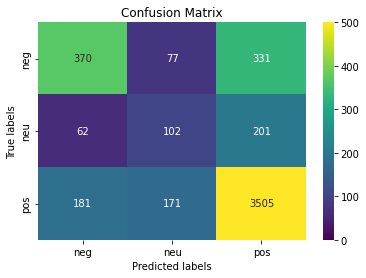

In [9]:
cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=500); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);

## - Plot bars

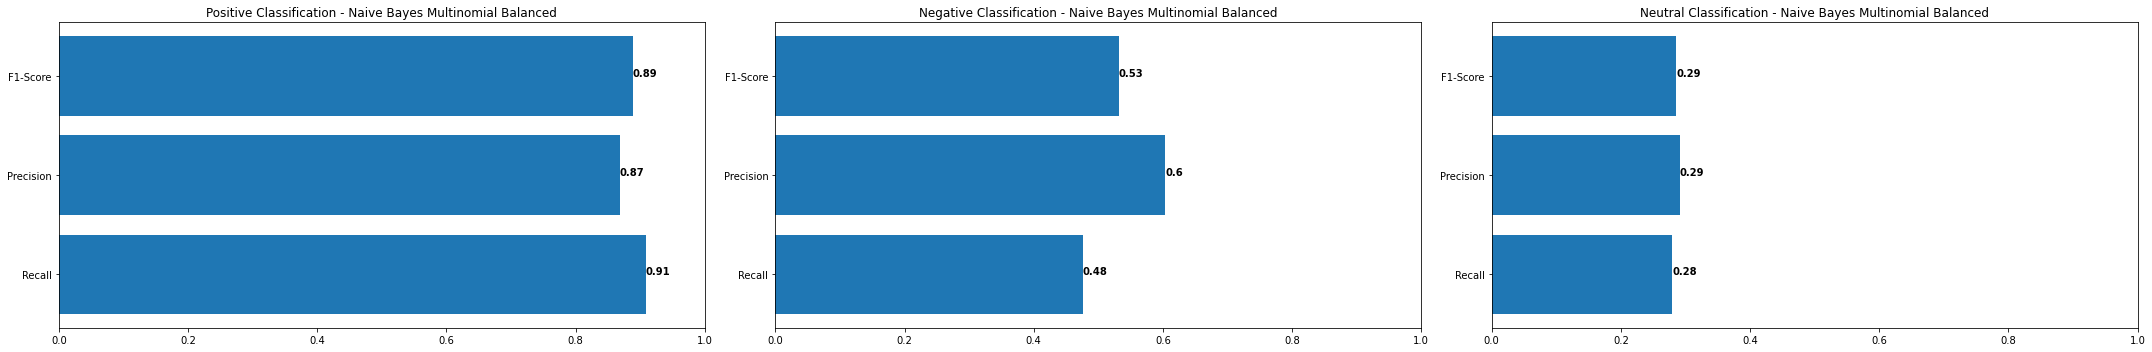

In [10]:
fix, ax = plt.subplots(1, 3, figsize = (30, 5))

y_axis = ['Recall', 'Precision', 'F1-Score']
x_axis_PNBRF = [recallPOS, precisaoPOS, f1sPOS];
x_axis_NNBRF = [recallNEG, precisaoNEG, f1sNEG];
x_axis_NENBRF = [recallNEU, precisaoNEU, f1sNEU];


ax[0].barh(y_axis, x_axis_PNBRF)
ax[0].set_title('Positive Classification - Naive Bayes Multinomial Balanced')
ax[0].set_xlim(0, 1)

ax[1].barh(y_axis, x_axis_NNBRF)
ax[1].set_title('Negative Classification - Naive Bayes Multinomial Balanced')
ax[1].set_xlim(0, 1)


ax[2].barh(y_axis, x_axis_NENBRF)
ax[2].set_title('Neutral Classification - Naive Bayes Multinomial Balanced')
ax[2].set_xlim(0, 1)

for i, v in enumerate(x_axis_PNBRF):
    ax[0].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NNBRF):
    ax[1].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')

for i, v in enumerate(x_axis_NENBRF):
    ax[2].text(v, i, str(round(v,2)), color = 'black', fontweight = 'bold')
    

plt.tight_layout()
plt.show()

# Task 7:
## Compare Score with Naive Bayes Multinomial Classification

In [11]:
positive = []; negative = []; neutral = []

for xs, i in enumerate(y_real_pred):
  if i == 'neutral':
    neutral.append(df.iloc[xs, 7])
  elif i == 'negative':
    negative.append(df.iloc[xs, 7])
  else:
    positive.append(df.iloc[xs, 7])

pos = []
neg = []
neu = []

for i in range(1, 6):
    pos.append(positive.count(i))

for i in range(1, 6):
  neg.append(negative.count(i))

for i in range(1, 6):
  neu.append(neutral.count(i))

aux = [1,2,3,4,5]

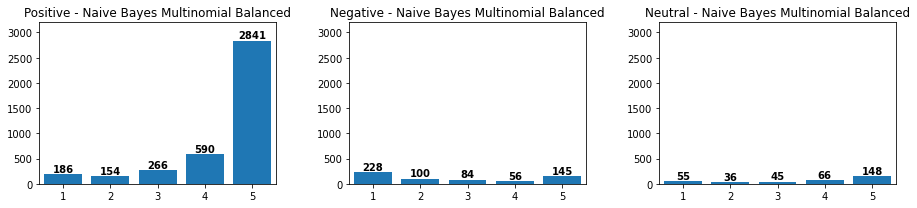

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(13,3))

ax[0].bar(aux, pos)
ax[0].set_title('Positive - Naive Bayes Multinomial Balanced')
ax[0].set_xlim(0.5, 5.5)
ax[0].set_ylim(0.0, 3200.0)

ax[1].bar(aux, neg)
ax[1].set_title('Negative - Naive Bayes Multinomial Balanced')
ax[1].set_xlim(0.5, 5.5)
ax[1].set_ylim(0.0, 3200.0)

ax[2].bar(aux, neu)
ax[2].set_title('Neutral - Naive Bayes Multinomial Balanced')
ax[2].set_xlim(0.5, 5.5)
ax[2].set_ylim(0.0, 3200.0)

# Make some labels.
rects = ax[0].patches
labels = [f"{i}" for i in pos]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[1].patches
labels = [f"{i}" for i in neg]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[1].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

rects = ax[2].patches
labels = [f"{i}" for i in neu]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[2].text(rect.get_x() + rect.get_width() / 2, int(label) + 5, label, ha="center", va="bottom", color = 'black', fontweight = 'bold')

plt.tight_layout()
plt.show()